# Importing Libraries

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Training and Testing Dataset

Text(0.5, 1.0, 'Ground Truth : 5')

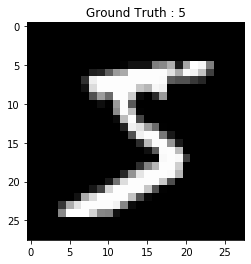

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# display the first image in the training data
plt.imshow(train_images[0, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

# Converting shape and data

In [3]:
# process the data
# 1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')


# Changing to One-Hot encoding

In [4]:
# scale data
# train_data /=255.0
# test_data /=255.0

# change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Adding Dense Layer and Evaluating Loss and Accuracy

In [5]:
# creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(600, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.4143 - accuracy: 0.8728 - val_loss: 0.2526 - val_accuracy: 0.9218
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2035 - accuracy: 0.9377 - val_loss: 0.1687 - val_accuracy: 0.9465
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.1565 - accuracy: 0.9523 - val_loss: 0.1674 - val_accuracy: 0.9481
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.1314 - accuracy: 0.9591 - val_loss: 0.1341 - val_accuracy: 0.9590
Epoch 5/5
10000/10000 [==============================] - 1s 109us/step
Evaluation result on Test Data : Loss = 0.13702251943945884, accuracy = 0.9587000012397766
